In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
df = pd.read_csv('FlightDelays.csv')

**Data Visualization**

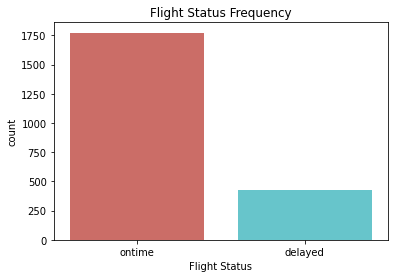

In [0]:
df['Flight Status'].value_counts()
sns.countplot(x='Flight Status', data = df, palette='hls')
plt.title('Flight Status Frequency')
plt.savefig('Fl_St_Freq')

In [0]:
count_ontime = len(df[df['Flight Status']=='ontime'])
count_delayed = len(df[df['Flight Status']=='delayed'])
pct_of_ontime = count_ontime/(count_ontime+count_delayed)
print("percentage of ontime is", pct_of_ontime*100)
pct_of_delayed = count_delayed/(count_ontime+count_delayed)
print("percentage of delayed is", pct_of_delayed*100)

percentage of ontime is 80.5542935029532
percentage of delayed is 19.445706497046796


Preprocessing for outcome and dept time into hour blocks



In [0]:
## Changing ontime to 0 and delayed to 1

y_del = df['Flight Status'].to_numpy()
y_arr=[]
for k in y_del:
    if k == 'ontime':
      y_arr.append(0)
    else:
      y_arr.append(1)
np.unique(y_arr)

## concatenating in dataframe
df2 = pd.DataFrame(data=y_arr, columns=["Prob_delayed"])
df = pd.concat([df2, df], axis=1)

In [0]:
# Dept time into hour blocks
dept_time = df['DEP_TIME'].to_numpy()
crs_time = df['CRS_DEP_TIME'].to_numpy()

time_blocks_list= dept_time//100
time_diff_count = np.zeros(6, int)
total_count = np.zeros(6, int)

time_diff_hr = (dept_time//100)-(crs_time//100)
time_diff_mins = (dept_time%100) - (crs_time%100)
time_diff=(time_diff_hr*60)+time_diff_mins

for i in range(len(dept_time)):
#  print (time)
  if time_diff[i] < 1200:
    time_diff[i] = time_diff[i] + (24*60)
  if time_diff[i] > 1200:
    time_diff[i] = time_diff[i] - (24*60)
  
  if (time_diff[i] < 0):
    total_count[0] = total_count[0] + 1
  elif (time_diff[i] < 5):
    total_count[1] = total_count[1] + 1
  elif (time_diff[i] < 10):
    total_count[2] = total_count[2] + 1
  elif (time_diff[i] < 15):
    total_count[3] = total_count[3] + 1
  elif (time_diff[i] < 20):
    total_count[4] = total_count[4] + 1
  else:
    total_count[5] = total_count[5] + 1
  if y_arr[i] == 1:
    if (time_diff[i] < 0):
      time_diff_count[0] = time_diff_count[0] + 1
    elif (time_diff[i] < 5):
      time_diff_count[1] = time_diff_count[1] + 1
    elif (time_diff[i] < 10):
      time_diff_count[2] = time_diff_count[2] + 1
    elif (time_diff[i] < 15):
      time_diff_count[3] = time_diff_count[3] + 1
    elif (time_diff[i] < 20):
      time_diff_count[4] = time_diff_count[4] + 1
    else:
      time_diff_count[5] = time_diff_count[5] + 1
  

## concatenating in dataframe
df1 = pd.DataFrame(data = time_blocks_list, columns= ["hour_block"])
df2 = pd.DataFrame(data = time_diff, columns = ["time_diff"])
df = pd.concat([df2, df1, df], axis=1)
# df.head()

Charts

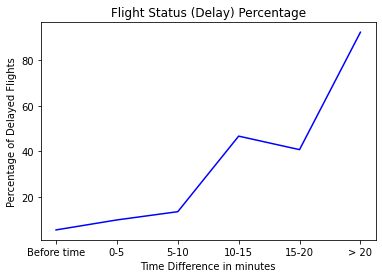

In [0]:
# data = df.sort_values("time_diff", axis =0, ascending=True)
# y_arr_mod = data['Prob_delayed'].to_numpy()
# time_del = data['time_diff'].to_numpy()

# time_del_x, indices_dep, counts = np.unique(time_del, return_inverse=True, return_counts=True)
# count_dep = np.zeros(4,int)
# for i in range(len(indices_dep)):
#   if y_arr_mod[i] == 1:
#     count_dep[indices_dep[i]] = count_dep[indices_dep[i]] + 1
x = ['Before time','0-5','5-10','10-15','15-20','> 20']
# plt.plot(x, time_diff_count, 'blue')
# plt.title('Flight Status (Delay) Frequency')
# plt.xlabel('Time Difference in minutes')
# plt.ylabel('Frequency of Delayed Flights')
# plt.savefig('diff_time_cont')

plt.plot(x, time_diff_count*100/total_count, 'blue')
plt.title('Flight Status (Delay) Percentage')
plt.xlabel('Time Difference in minutes')
plt.ylabel('Percentage of Delayed Flights')
plt.savefig('diff_time_cont')

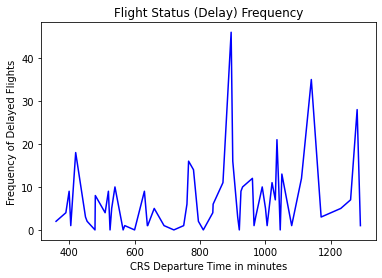

In [0]:
## line graph for time in minutes
data = df.sort_values("DEP_TIME", axis =0, ascending=True)

y_arr_mod = data['Prob_delayed'].to_numpy()
dept_time = data['DEP_TIME'].to_numpy()

dept_time = (dept_time // 100)*60 + (dept_time % 100)
dept_time_x, indices_dep, counts = np.unique(dept_time, return_inverse=True, return_counts=True)
count_dep = np.zeros(len(dept_time_x),int)
for i in range(len(indices_dep)):
  if y_arr_mod[i] == 1:
    count_dep[indices_dep[i]] = count_dep[indices_dep[i]] + 1

data = df.sort_values("CRS_DEP_TIME", axis =0, ascending=True)

y_arr_mod = data['Prob_delayed'].to_numpy()
crs_time = data['CRS_DEP_TIME'].to_numpy()

crs_time = (crs_time // 100)*60 + (crs_time % 100)
crs_time= np.sort(crs_time)
crs_time_x, indices_crs, counts_crs = np.unique(crs_time, return_inverse=True, return_counts=True)
count_crs = np.zeros(len(crs_time_x),int)
for i in range(len(indices_crs)):
  if y_arr_mod[i] == 1:
    count_crs[indices_crs[i]] = count_crs[indices_crs[i]] + 1


plt.plot(crs_time_x, count_crs, 'blue')
plt.title('Flight Status (Delay) Frequency')
plt.xlabel('CRS Departure Time in minutes')
plt.ylabel('Frequency of Delayed Flights')
plt.savefig('Delay_time_cont')

# plt.plot(dept_time_x, count_dep, 'green')
# plt.title('Flight Status (Delay) Frequency')
# plt.xlabel('Departure Time in minutes')
# plt.ylabel('Frequency of Delayed Flights')
# # plt.savefig('Delay_time_cont')

##################################################################################
## adding dept time and crs time in minutes to the model
df = df.drop(['CRS_DEP_TIME','DEP_TIME'], axis=1)
## concatenating in dataframe
df1 = pd.DataFrame(data = crs_time, columns= ["CRS_DEP_TIME"])
df2 = pd.DataFrame(data = dept_time, columns = ["DEP_TIME"])

df = pd.concat([df2, df1, df], axis=1)
# df.head()


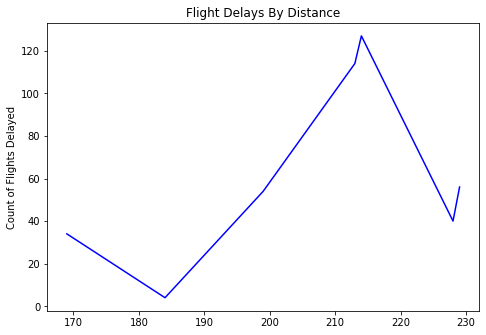

In [0]:
##### distances

dist = df[['DISTANCE','Flight Status']]
dist_del = dist.loc[dist['Flight Status'] == 'delayed']
dist_del = dist_del.drop(['Flight Status'],axis=1)
dist_del = dist_del['DISTANCE'].to_numpy()
dist_del = np.sort(dist_del)

y_num_delay = []
time_of_delay2 = []
time_of_delay2.append(dist_del[0])
y_num_delay.append(1)
unique = True

for i in range(len(dist_del)):
    unique = True
    for j in range(len(time_of_delay2)):
        if(dist_del[i] == time_of_delay2[j]):
            y_num_delay[j] = y_num_delay[j]+1
            unique = False
            break
        #else:
           # time_of_delay.append(crs_del[])
    if(unique == True):
        time_of_delay2.append(dist_del[i])
        y_num_delay.append(1)

fig10 = plt.figure()
ax10 = fig10.add_axes([0,0,1,1])
ax10.set_ylabel('Count of Flights Delayed')
ax10.set_title('Flight Delays By Distance')
ax10.plot(time_of_delay2, y_num_delay, 'blue')
#plt.savefig('%delay_by__dept_time.png', bbox_inches='tight')

Text(0, 0.5, 'Proportion of Delay')

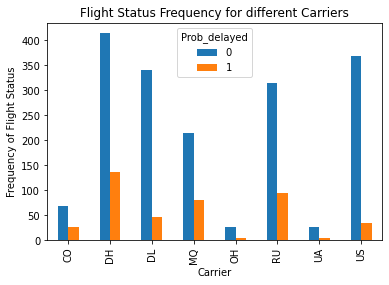

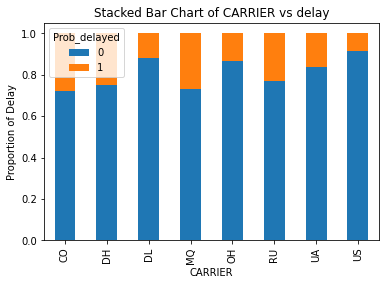

In [0]:
###### carrier 

pd.crosstab(df.CARRIER,df.Prob_delayed).plot(kind='bar')
plt.title('Flight Status Frequency for different Carriers')
plt.xlabel('Carrier')
plt.ylabel('Frequency of Flight Status')
plt.savefig('Delay_fre_Carrier')

table=pd.crosstab(df.CARRIER,df.Prob_delayed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of CARRIER vs delay')
plt.xlabel('CARRIER')
plt.ylabel('Proportion of Delay')

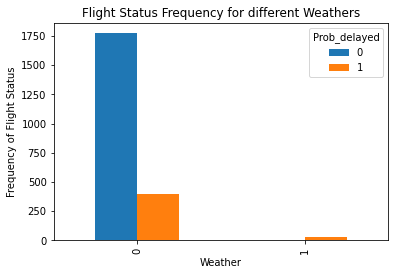

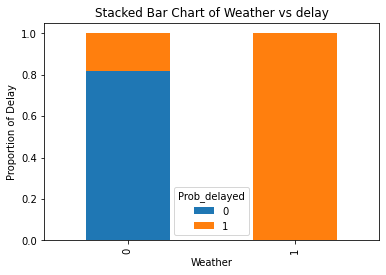

In [0]:
### Weather

pd.crosstab(df.Weather,df.Prob_delayed).plot(kind='bar')
plt.title('Flight Status Frequency for different Weathers')
plt.xlabel('Weather')
plt.ylabel('Frequency of Flight Status')
plt.savefig('Delay_fre_Weather')

table=pd.crosstab(df.Weather,df.Prob_delayed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Weather vs delay')
plt.xlabel('Weather')
plt.ylabel('Proportion of Delay')
plt.savefig('hour_vs_prop_stack')

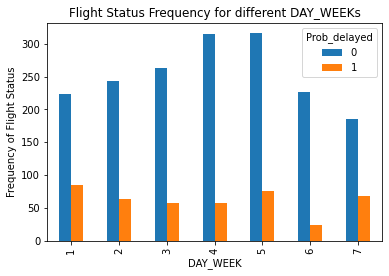

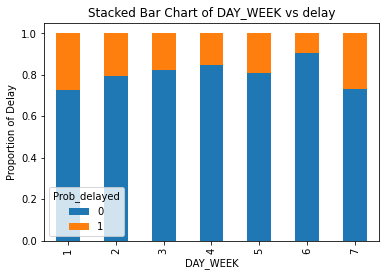

In [0]:
#### Day of week

pd.crosstab(df.DAY_WEEK,df.Prob_delayed).plot(kind='bar')
plt.title('Flight Status Frequency for different DAY_WEEKs')
plt.xlabel('DAY_WEEK')
plt.ylabel('Frequency of Flight Status')
plt.savefig('Delay_fre_DAY_WEEK')

table=pd.crosstab(df.DAY_WEEK,df.Prob_delayed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of DAY_WEEK vs delay')
plt.xlabel('DAY_WEEK')
plt.ylabel('Proportion of Delay')
plt.savefig('Day_Week_vs_prop_stack')

## good estimator

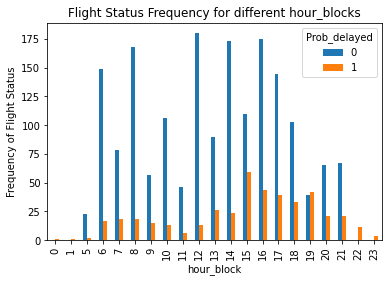

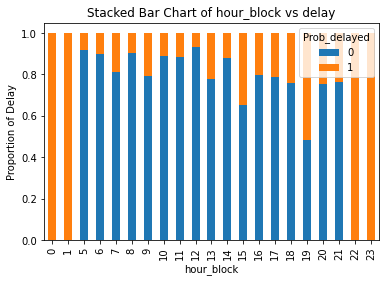

In [0]:
pd.crosstab(df.hour_block,df.Prob_delayed).plot(kind='bar')
plt.title('Flight Status Frequency for different hour_blocks')
plt.xlabel('hour_block')
plt.ylabel('Frequency of Flight Status')
plt.savefig('Delay_fre_hour_block')

table=pd.crosstab(df.hour_block,df.Prob_delayed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of hour_block vs delay')
plt.xlabel('hour_block')
plt.ylabel('Proportion of Delay')
plt.savefig('hour_vs_prop_stack')

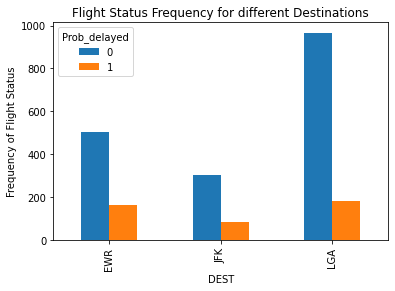

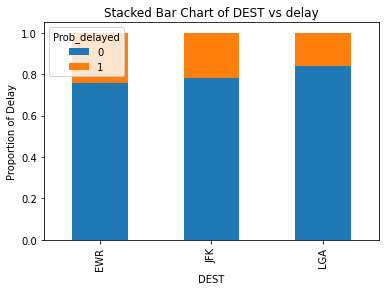

In [0]:
######## DEST
pd.crosstab(df.DEST,df.Prob_delayed).plot(kind='bar')
plt.title('Flight Status Frequency for different Destinations')
plt.xlabel('DEST')
plt.ylabel('Frequency of Flight Status')
plt.savefig('Delay_fre_DEST')

table=pd.crosstab(df.DEST,df.Prob_delayed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of DEST vs delay')
plt.xlabel('DEST')
plt.ylabel('Proportion of Delay')
plt.savefig('DEST_vs_prop_stack')

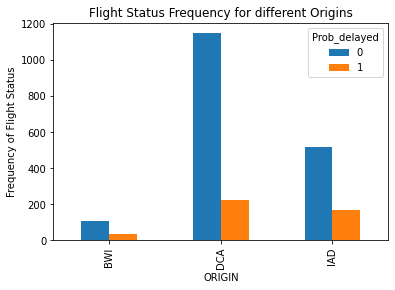

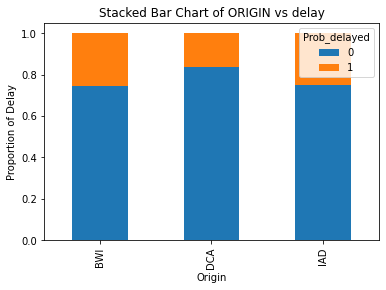

In [0]:
####### ORIGIN
pd.crosstab(df.ORIGIN,df.Prob_delayed).plot(kind='bar')
plt.title('Flight Status Frequency for different Origins')
plt.xlabel('ORIGIN')
plt.ylabel('Frequency of Flight Status')
plt.savefig('Delay_fre_ORIGIN')

table=pd.crosstab(df.ORIGIN,df.Prob_delayed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of ORIGIN vs delay')
plt.xlabel('Origin')
plt.ylabel('Proportion of Delay')
plt.savefig('Origin_vs_prop_stack')

**One Hot Key Encoding**

In [0]:
dum_df = pd.get_dummies(df, 
                  columns=["CARRIER","DEST","ORIGIN","Weather","DAY_OF_MONTH","hour_block","DAY_WEEK","TAIL_NUM","FL_NUM"], 
                  prefix=["Carrier_is","Dest_is","Origin_is","Weath_is","Day_mon_is","hour_block_","Day_is","Tail_is","Flno_is"])

**Train_test split**

In [0]:
from sklearn.model_selection import train_test_split
y = dum_df['Prob_delayed']
X = dum_df.drop(['Prob_delayed','FL_DATE','Flight Status','CRS_DEP_TIME','DEP_TIME'],axis=1)
# print (X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=888)

**Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(max_iter = 500)
logreg.fit(X_train, y_train)

coef_dict = {}
i = 0
for coef in logreg.coef_:
  coef_new = coef
for coef, feat in zip(coef_new,X_train.columns):
  coef_dict[feat] = coef
  i = i+1
# for k,v in coef_dict.items():
#   print ("Coeff for", k, "is", v )

**Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_train, y_train)

print("The depth of Decision Tree Classifier is", clf.get_depth())
print("The value is quite high and hence the model is discarded for the time")

The depth of Decision Tree Classifier is 56
The value is quite high and hence the model is discarded for the time


In [0]:
 y_pred_log = logreg.predict(X_test)
 y_pred_dt = clf.predict(X_test)
 score = clf.score(X_test, y_test)
# print(logreg.coef_)
# print(logreg.intercept_)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))
print('Accuracy of Decision Tree regression classifier on test set: {:.4f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.9171
Accuracy of Decision Tree regression classifier on test set: 0.8910


**Feature Selection**

In [0]:
dum_df = pd.get_dummies(df, 
                  columns=["DAY_OF_MONTH","hour_block","Weather"], 
                  prefix=["Day_mon_is","hour_block_","Weath"])

y = dum_df['Prob_delayed']
X = dum_df.drop(['Prob_delayed','FL_DATE','Flight Status','DEP_TIME','CRS_DEP_TIME','TAIL_NUM','FL_NUM',"DEST","ORIGIN","CARRIER"],axis=1)
# print (X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=888)

In [0]:
logreg = LogisticRegression(max_iter = 200)
rfe = logreg.fit(X_train, y_train)

In [0]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

df['Day_month',] =  labelencoder.fit_transform(df["DAY_OF_MONTH"])
df['hour_label'] =  labelencoder.fit_transform(df["hour_block"])
df['weat_label'] =  labelencoder.fit_transform(df["Weather"])


y = dum_df['Prob_delayed']
X = dum_df.drop(['Prob_delayed','FL_DATE','Flight Status','DEP_TIME','CRS_DEP_TIME','TAIL_NUM','FL_NUM',"DEST","ORIGIN","CARRIER"],axis=1)
# print (X) 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=889)

clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_train, y_train)
# print(clf.get_depth())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
 y_pred_log = rfe.predict(X_test)
 y_pred_dt = clf.predict(X_test)

print('With Feature Selection')
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(rfe.score(X_test, y_test)))
print('Accuracy of Decision Tree regression classifier on test set: {:.4f}'.format(clf.score(X_test, y_test)))

With Feature Selection
Accuracy of logistic regression classifier on test set: 0.9194
Accuracy of Decision Tree regression classifier on test set: 0.8729
